In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("C:/Users/Brown/Documents/GitHubRepo/Analysis_With_Super_Store_Data/Superstore.xls", sheet_name= "Orders")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df.select_dtypes(include =['int64', 'float64']).columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [6]:
df.select_dtypes(include =['object']).columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name'],
      dtype='object')

In [7]:
df.select_dtypes(include = ['datetime64[ns]']).columns

Index(['Order Date', 'Ship Date'], dtype='object')

# Basic Exploratory Data Analysis



#### What  are the total sales and profits for the store for each year in the datasets?

In [8]:
# create new column(Year)
df['year'] = df['Order Date'].dt.year
#df.head()
#calculate the total sales for each year?
sales_by_year = df.groupby('year')['Sales'].sum()
sales_by_year

year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

In [9]:
# create new column(Year)
df['year'] = df['Order Date'].dt.year
#df.head()
#calculate the total profit for each year?
Profit_by_year = df.groupby('year')['Profit'].sum()
Profit_by_year

year
2014    49543.9741
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: Profit, dtype: float64

### What are the top-selling products in terms of revenue and quantity sold?

In [10]:
#What are the top-selling products in terms of revenue and quantity sold?
product_sales = df.groupby('Product Name').agg({'Sales' : 'sum','Quantity' :'sum'})

#product_sales.sort_values(by='sales', ascending=False).head(10)
product_sales.sort_values(by='Quantity', ascending= False).head(10)

,Sales,Quantity
Product Name,,
Staples,755.470,215
Staple envelope,1686.812,170
Easy-staple paper,2504.192,150
Staples in misc. colors,478.812,86
KI Adjustable-Height Table,4552.641,74
Avery Non-Stick Binders,217.316,71
Storex Dura Pro Binders,278.586,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,780.456,67
"Situations Contoured Folding Chairs, 4/Set",3641.274,64


#### What are the top product categories in terms of revenue and quantity sold?


In [11]:
#What are the top product categories in terms of revenue and quantity sold?
category_sales = df.groupby('Category').agg({'Sales' : 'sum','Quantity' :'sum'})

#category_sales.sort_values(by='Sales', ascending=False).head()
category_sales.sort_values(by='Quantity', ascending=False).head()

,Sales,Quantity
Category,,
Office Supplies,719047.0320,22906
Furniture,741999.7953,8028
Technology,836154.0330,6939


#### what is the average order value and how does it vary by product category?

In [12]:
# what is the aveage order value and how does it vary by product category?
order_revenue = df.groupby('Order ID')['Sales'].sum()
avg_order_value = order_revenue.mean()

# calcuated the avg order value by product category
category_avg_order_value = df.groupby('Category')['Sales'].mean()

print("Average Order Value: ${:.2f}".format(avg_order_value))
print("\nAverage Order Value by Product Category: ")
print(category_avg_order_value)

Average Order Value: $458.61

Average Order Value by Product Category: 
Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64


#### Who are the top customers in terms of total spending and number of orders?

In [13]:
#who are the top customers in terms of total spending and number of orders?

customer_spending = df.groupby('Customer Name')['Sales'].sum()
top_customers_by_spending =customer_spending.sort_values(ascending= False).head(3)


customer_orders = df.groupby('Customer Name')['Order ID'].nunique()
top_customers_by_orders = customer_orders.sort_values(ascending=False).head(3)


print('Top 3 Customes by total spending:')
print(top_customers_by_spending)
print('\nTop 3 Custoers by NUmber Orders:')
print(top_customers_by_orders)

Top 3 Customes by total spending:
Customer Name
Sean Miller     25043.050
Tamara Chand    19052.218
Raymond Buch    15117.339
Name: Sales, dtype: float64

Top 3 Custoers by NUmber Orders:
Customer Name
Emily Phan       17
Sally Hughsby    13
Erin Ashbrook    13
Name: Order ID, dtype: int64


### How does sales performance vary across different regions or state?

In [20]:
#How does sales performance vary across different regions or state?
region_sales = df.groupby("Region")["Sales"].sum()
state_sales = df.groupby("State")["Sales"].sum()

top_region_sales = region_sales.sort_values(ascending = False)
top_state_sales = state_sales.sort_values(ascending = False).head(10)

print ("Total Sales by Region:")
print (top_region_sales)
print ("\nTotal Sales by State:")
print (top_state_sales)

Total Sales by Region:
Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

Total Sales by State:
State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64


### How do sales trends vary across different timeperiods(e.g.,months, quarters, years)?

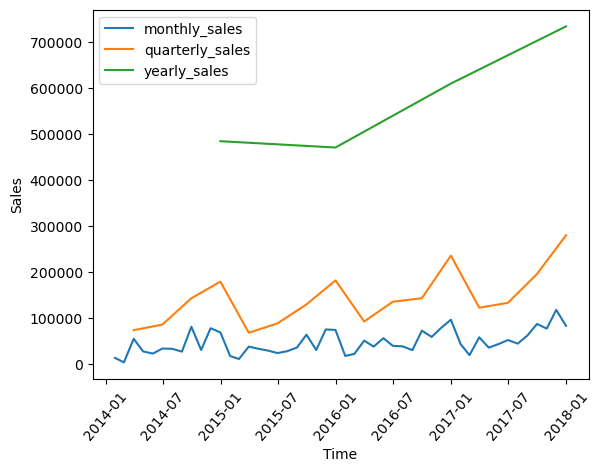

In [22]:
#How do sales trends vary across different timeperiods(e.g.,months, quarters, years)?
monthly_sales = df.groupby(pd.Grouper(key = 'Order Date' , freq = 'M'))['Sales'].sum()
quarterly_sales = df.groupby(pd.Grouper(key = 'Order Date' , freq = 'Q'))['Sales'].sum()
yearly_sales = df.groupby(pd.Grouper(key = 'Order Date' , freq = 'Y'))['Sales'].sum()


#Plot the sales trends over time
plt.plot(monthly_sales, label='monthly_sales')
plt.plot(quarterly_sales , label ='quarterly_sales')
plt.plot(yearly_sales , label = 'yearly_sales')
plt.xticks(rotation = 50)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Can we use the data to forecast future sales and identify potential growth opportunities for the business?

In [26]:
!pip install --upgrade statsmodels


     ---------------------------------------- 9.4/9.4 MB 42.4 kB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from statsmodels.tsa.arima.model import ARIMA

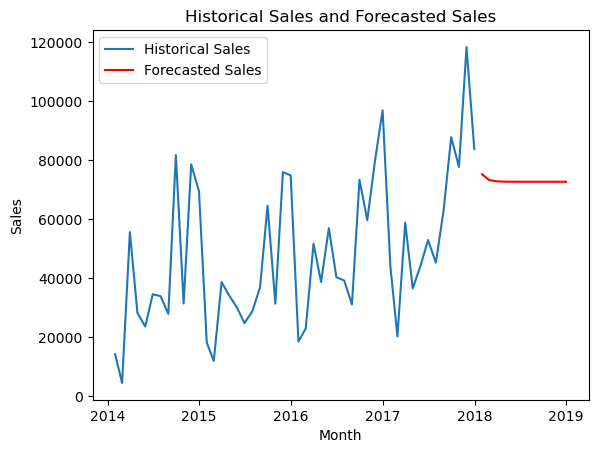

In [40]:
# Create a new DataFrame for sales data by month
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()

# Fit an ARIMA model to the monthly sales data
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Generate forecasted sales data for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the historical sales data and forecasted sales data
plt.plot(monthly_sales.index, monthly_sales.values, label='Historical Sales')
plt.plot(forecast.index, forecast, color='red', label='Forecasted Sales')
plt.title("Historical Sales and Forecasted Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()


## Data Visualisation

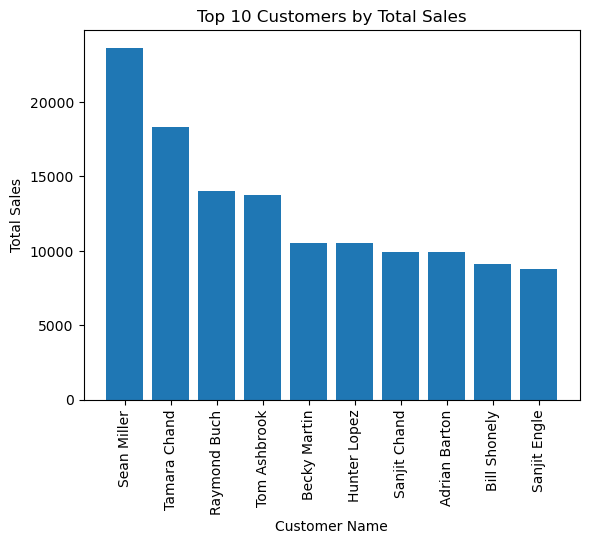

      Customer Name Order Date Region         Category     Sales
43     Hunter Lopez 2014-01-20  South       Technology    699.93
44     Hunter Lopez 2014-01-20  South  Office Supplies     22.96
45     Hunter Lopez 2014-01-20  South        Furniture     38.60
46     Hunter Lopez 2014-01-20  South  Office Supplies      6.63
47     Hunter Lopez 2014-01-20  South  Office Supplies     23.34
...             ...        ...    ...              ...       ...
9291   Sanjit Engle 2017-11-13   West       Technology     82.95
9326   Hunter Lopez 2017-11-17   East       Technology  10499.97
9370  Adrian Barton 2017-11-19  South        Furniture    821.88
9371  Adrian Barton 2017-11-19  South  Office Supplies     21.96
9865   Sanjit Engle 2017-12-21   West  Office Supplies    124.36

[152 rows x 5 columns]


In [70]:
# Group the data by customers name and location and calculate total sales
customer_sales = df.groupby(['Customer Name', 'Segment', 'City', 'State']).agg({'Sales': 'sum'}).reset_index()

# Sort results by sales in descending order
customer_sales = customer_sales.sort_values(by='Sales', ascending=False)

# Creating a bar chart showing top 10 customers by total sales
top_10 = customer_sales.head(10)
plt.bar(top_10['Customer Name'], top_10['Sales'])
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Customers by Total Sales')
plt.show()

# Display the order history for the top 10 customers
top_10_history = df[df['Customer Name'].isin(top_10['Customer Name'])]
print(top_10_history[['Customer Name', 'Order Date', 'Region', 'Category', 'Sales']])


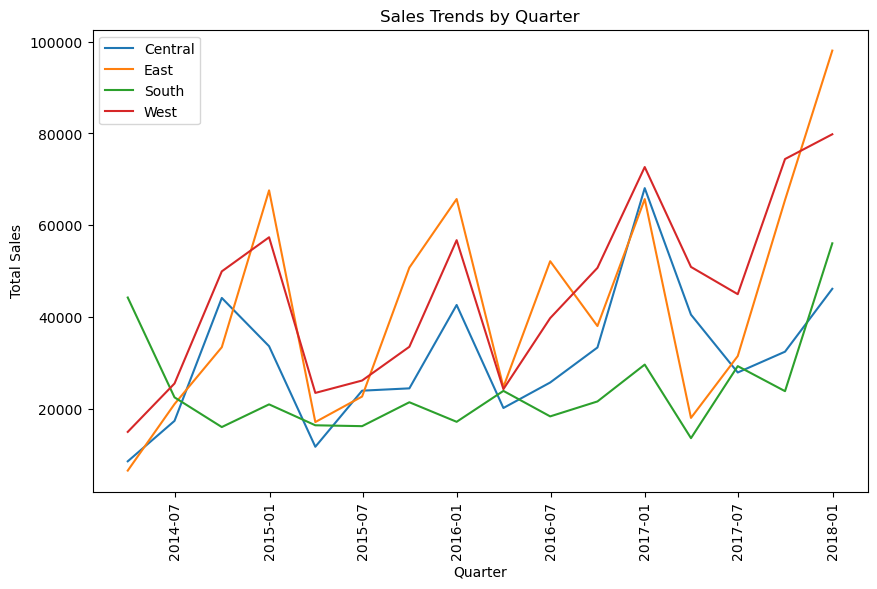

In [74]:
# Group the data by quarter and region or category
sales_by_quarter = df.groupby([pd.Grouper(key='Order Date', freq='Q'), 'Region'])['Sales'].sum()

# Plot a line chart
fig, ax = plt.subplots(figsize=(10, 6))
for region in sales_by_quarter.index.get_level_values('Region').unique():
    ax.plot(sales_by_quarter.loc[:, region].index, sales_by_quarter.loc[:, region].values, label=region)

plt.xticks(rotation=90)
ax.set_xlabel('Quarter')
ax.set_ylabel('Total Sales')
ax.set_title('Sales Trends by Quarter')
ax.legend()
plt.show()


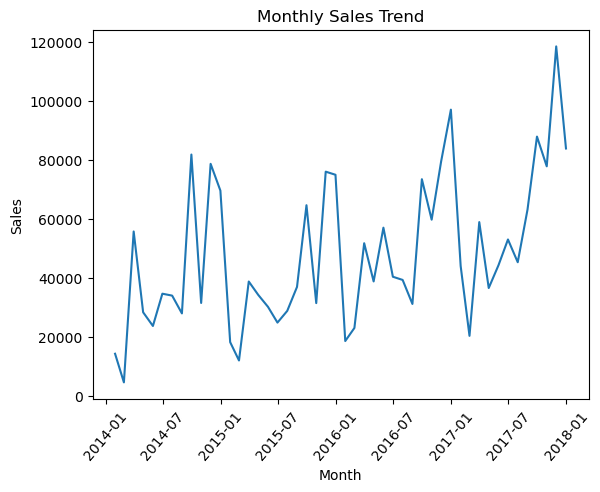

In [78]:
# Get monthly sales data

monthly_sales = df.groupby(pd.Grouper(key = 'Order Date', freq='M')).agg({"Sales" : "sum"})

# Plot monthly sales trend
plt.plot(monthly_sales.index, monthly_sales['Sales'])
plt.xticks(rotation = 50)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")

plt.show()

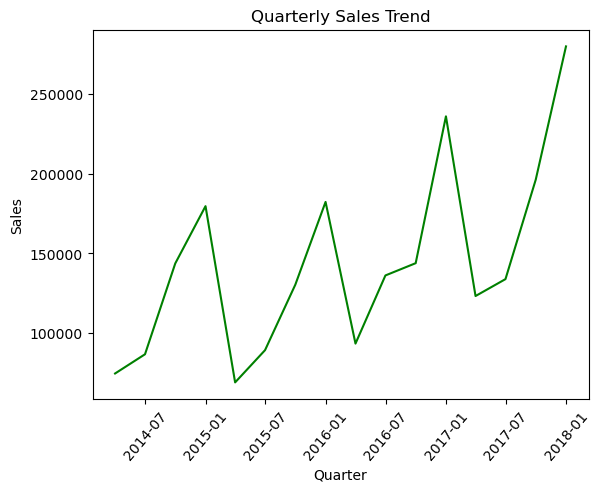

In [81]:
# Plot quarterly sales trend 
plt.plot(quarterly_sales.index, quarterly_sales.values, color = 'green')
plt.xticks(rotation = 50)
plt.title("Quarterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.show()